# Historical Data Analysis
Goal: see if we can find trends in historical data and also to compare generated (ETAS) with recorded (USGS) data

Read in, format, and filter CSV data to remove earthquakes at unwanted lat/lon coordinates

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


In [136]:
csv_file = "Formatted_ETAS_Output.csv"
etas = pd.read_csv(csv_file, sep = ',', lineterminator='\n')
etas.head()

,Date,Time,Year,X,Y,Magnitude,Z\r
0,12/31/59,0:03:09.00,1960.002196,-119.0502,33.9790,6.50,8.2474
1,1/2/60,0:08:49.00,1960.006125,-115.6222,33.0793,4.25,7.9322
2,1/2/60,0:10:31.00,1960.007305,-115.6323,33.1220,3.03,8.4015
3,1/2/60,0:10:32.00,1960.007320,-115.5851,33.0745,3.03,7.9678
4,1/2/60,0:11:07.00,1960.007720,-115.6256,33.0290,3.08,7.9737


In [137]:
csv_file = "All (1960-2023).csv"
usgs = pd.read_csv(csv_file, sep = ',', lineterminator='\n', dtype={'time':str})
usgs.head()

C:\Users\deyan\AppData\Local\Temp\ipykernel_12188\3779433482.py:2: DtypeWarning:

Columns (1,2,3,4,6,7,8,9,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.



,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,\r
0,2023-10-12T21:41:21.480Z,36.466167,-120.875503,15.85,3.15,ml,60.0,135.0,0.1035,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
1,2023-10-08T21:30:23.900Z,38.827167,-122.804,1.75,3.87,mw,108.0,20.0,0.006058,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
2,2023-10-05T03:09:58.000Z,35.041,-117.661,0.79,3.52,ml,63.0,40.0,0.1102,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
3,2023-10-01T19:29:36.760Z,40.2915,-124.2905,9.59,3.61,mw,40.0,115.0,0.0308,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
4,2023-10-01T15:41:29.620Z,40.295167,-124.287,9.8,4.09,mw,42.0,105.0,0.02685,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r


In [138]:
#converting the Date column into datetime format
etas["Date"] = pd.to_datetime(etas["Date"], errors="coerce", format="%m/%d/%y")
etas.loc[etas["Date"].dt.year > pd.Timestamp.now().year, "Date"] -= pd.DateOffset(years=100)

etas.head()

,Date,Time,Year,X,Y,Magnitude,Z\r
0,1959-12-31,0:03:09.00,1960.002196,-119.0502,33.9790,6.50,8.2474
1,1960-01-02,0:08:49.00,1960.006125,-115.6222,33.0793,4.25,7.9322
2,1960-01-02,0:10:31.00,1960.007305,-115.6323,33.1220,3.03,8.4015
3,1960-01-02,0:10:32.00,1960.007320,-115.5851,33.0745,3.03,7.9678
4,1960-01-02,0:11:07.00,1960.007720,-115.6256,33.0290,3.08,7.9737


In [139]:
#converting the Date column into datetime format
usgs["time"] = pd.to_datetime(usgs["time"], errors="coerce").dt.strftime("%Y-%m-%d")
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,\r
0,2023-10-12,36.466167,-120.875503,15.85,3.15,ml,60.0,135.0,0.1035,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
1,2023-10-08,38.827167,-122.804,1.75,3.87,mw,108.0,20.0,0.006058,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
2,2023-10-05,35.041,-117.661,0.79,3.52,ml,63.0,40.0,0.1102,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
3,2023-10-01,40.2915,-124.2905,9.59,3.61,mw,40.0,115.0,0.0308,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
4,2023-10-01,40.295167,-124.287,9.8,4.09,mw,42.0,105.0,0.02685,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r


In [140]:
#filter the dataset by Date > 1960-01-01 and Date < 2023-01-1 
etas = etas[(etas['Date'] > pd.to_datetime('1960-01-01')) & (etas['Date'] < pd.to_datetime('2023-01-01'))]

#filter the dataset by X > -123 and X < -113 and Y > 29 and Y < 39
etas = etas[etas['X'] > -123]
etas = etas[etas['X'] < -113]
etas = etas[etas['Y'] < 39]
etas = etas[etas['Y'] > 29]

etas.head()

,Date,Time,Year,X,Y,Magnitude,Z\r
1,1960-01-02,0:08:49.00,1960.006125,-115.6222,33.0793,4.25,7.9322
2,1960-01-02,0:10:31.00,1960.007305,-115.6323,33.1220,3.03,8.4015
3,1960-01-02,0:10:32.00,1960.007320,-115.5851,33.0745,3.03,7.9678
4,1960-01-02,0:11:07.00,1960.007720,-115.6256,33.0290,3.08,7.9737
5,1960-01-02,0:11:17.00,1960.007840,-115.6050,33.0276,3.61,7.9322


In [141]:
#filter the dataset by Date > 1960-01-01 and Date < 2023-01-1 
usgs = usgs[(pd.to_datetime(usgs['time']) > pd.to_datetime('1960-01-01')) & (pd.to_datetime(usgs['time']) < pd.to_datetime('2023-01-01'))]

usgs['longitude'] = pd.to_numeric(usgs['longitude'], errors='coerce')
usgs['latitude'] = pd.to_numeric(usgs['latitude'], errors='coerce')

#filter the dataset by X > -123 and X < -113 and Y > 29 and Y < 39
usgs = usgs[usgs['longitude'] > -123]
usgs = usgs[usgs['longitude'] < -113]
usgs = usgs[usgs['latitude'] < 39]
usgs = usgs[usgs['latitude'] > 29]
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,\r
240,2022-12-31,33.397500,-116.393333,3.88,4.14,mw,132.0,16.0,0.07391,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
241,2022-12-31,34.355667,-116.921833,4.73,3.47,mw,121.0,25.0,0.07845,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
246,2022-12-22,37.620167,-122.025000,3.82,3.34,mw,141.0,16.0,NaN,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
262,2022-12-17,37.918167,-122.304000,5.48,3.57,mw,170.0,19.0,0.01598,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
263,2022-12-13,36.604667,-121.209333,8.88,3.28,ml,67.0,55.0,0.03812,0.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r


In [142]:
summary_stats = etas.describe(include="all")
print(summary_stats)

                                 Date        Time          Year             X  \
count                           31547       31547  31547.000000  31547.000000   
unique                            NaN       26489           NaN           NaN   
top                               NaN  6:49:17.00           NaN           NaN   
freq                              NaN           5           NaN           NaN   
mean    1991-09-14 02:33:35.963483008         NaN   1991.704948   -117.520496   
min               1960-01-02 00:00:00         NaN   1960.006125   -122.971200   
25%               1975-10-16 00:00:00         NaN   1975.794142   -118.711750   
50%               1992-01-15 00:00:00         NaN   1992.042660   -117.191400   
75%               2007-07-21 00:00:00         NaN   2007.554579   -116.092200   
max               2022-12-31 00:00:00         NaN   2023.001815   -113.246300   
std                               NaN         NaN     18.290538      2.080386   

                   Y     Ma

In [143]:
summary_stats = usgs.describe(include="all")
print(summary_stats)

              time      latitude     longitude    depth      mag magType  \
count        28052  28052.000000  28052.000000  28042.0  28052.0   28051   
unique       11447           NaN           NaN  12818.0    499.0      12   
top     2019-07-06           NaN           NaN      6.0      3.0      ml   
freq           605           NaN           NaN   1242.0   1321.0   18987   
mean           NaN     35.619491   -118.254409      NaN      NaN     NaN   
std            NaN      1.926341      2.120540      NaN      NaN     NaN   
min            NaN     32.176000   -122.992000      NaN      NaN     NaN   
25%            NaN     34.032000   -119.650750      NaN      NaN     NaN   
50%            NaN     35.873500   -118.058633      NaN      NaN     NaN   
75%            NaN     37.399000   -116.390167      NaN      NaN     NaN   
max            NaN     38.996000   -113.560667      NaN      NaN     NaN   

            nst      gap         dmin       rms  ... Unnamed: 991  \
count   26558.0  2

In [144]:
# Mean magnitude for each year
print(etas.groupby(etas.Date.dt.year)['Magnitude'].mean())

# Sum of magnitudes for each year
print(etas.groupby(etas.Date.dt.year)['Magnitude'].sum())


Date
1960    3.421501
1961    3.431192
1962    3.455392
1963    3.464771
1964    3.479369
          ...   
2018    3.410692
2019    3.476648
2020    3.452177
2021    3.435720
2022    3.451487
Name: Magnitude, Length: 63, dtype: float64
Date
1960    1549.94
1961    1554.33
1962    1717.33
1963    1663.09
1964    2094.58
         ...   
2018    1626.90
2019    1866.96
2020    1712.28
2021    1669.76
2022    1763.71
Name: Magnitude, Length: 63, dtype: float64


In [145]:
time = []
for i in usgs['time']:
    time.append(pd.to_datetime(i))
usgs['time'] = time

In [146]:
usgs['mag'] = pd.to_numeric(usgs['mag'], errors='coerce')

#group usgs times by year and print mean magnitude
print(usgs.groupby(usgs['time'].dt.year)['mag'].mean())

#group usgs times by year and print sum of magnitude
print(usgs.groupby(usgs['time'].dt.year)['mag'].sum())

time
1960    3.500103
1961    3.550617
1962    3.605721
1963    3.632488
1964    3.614620
          ...   
2018    3.429632
2019    3.454067
2020    3.439794
2021    3.429510
2022    3.416330
Name: mag, Length: 63, dtype: float64
time
1960     339.5100
1961     575.2000
1962     749.9900
1963     744.6600
1964     618.1000
          ...    
2018     559.0300
2019    4611.1800
2020    2999.5000
2021    1323.7907
2022     744.7600
Name: mag, Length: 63, dtype: float64


In [147]:
# Maximum magnitude earthquake for each year
print(etas.groupby(etas.Date.dt.year)['Magnitude'].max())

# Total number of earthquakes for each year
print(etas.groupby(etas.Date.dt.year)['Magnitude'].count())

Date
1960    5.22
1961    5.78
1962    6.38
1963    5.71
1964    7.65
        ... 
2018    6.36
2019    5.57
2020    6.28
2021    6.80
2022    6.46
Name: Magnitude, Length: 63, dtype: float64
Date
1960    453
1961    453
1962    497
1963    480
1964    602
       ... 
2018    477
2019    537
2020    496
2021    486
2022    511
Name: Magnitude, Length: 63, dtype: int64


In [148]:
# Maximum usgs magnitude for each year
print(usgs.groupby(usgs['time'].dt.year)['mag'].max())

# Total number of earthquakes for each year
print(usgs.groupby(usgs['time'].dt.year)['mag'].count())

time
1960    5.00
1961    5.88
1962    5.10
1963    5.40
1964    5.20
        ... 
2018    5.29
2019    7.10
2020    6.50
2021    6.00
2022    5.06
Name: mag, Length: 63, dtype: float64
time
1960      97
1961     162
1962     208
1963     205
1964     171
        ... 
2018     163
2019    1335
2020     872
2021     386
2022     218
Name: mag, Length: 63, dtype: int64


Grouping the data into 1 month chunks and then get the same feature values


In [149]:
# Mean magnitude for each month
mean_mag_etas = pd.DataFrame(etas.groupby(etas['Date'].dt.to_period('M')).Magnitude.mean())

# Sum of magnitudes for each month
sum_mag_etas = pd.DataFrame(etas.groupby(etas['Date'].dt.to_period('M')).Magnitude.sum())

In [150]:
# Mean magnitude for each month
mean_mag_usgs = pd.DataFrame(usgs.groupby(usgs['time'].dt.to_period('M')).mag.mean())

# Sum of magnitudes for each month
sum_mag_usgs = pd.DataFrame(usgs.groupby(usgs['time'].dt.to_period('M')).mag.sum())

In [151]:
# Maximum magnitude earthquake for each month
max_mag_etas = pd.DataFrame(etas.groupby(etas['Date'].dt.to_period('M')).Magnitude.max())
print(max_mag_etas)

# Total number of earthquakes for each month
earthquake_count_etas = pd.DataFrame(etas.groupby(etas['Date'].dt.to_period('M')).Magnitude.count())

         Magnitude
Date              
1960-01       4.25
1960-02       4.68
1960-03       5.22
1960-04       4.49
1960-05       4.29
...            ...
2022-08       4.02
2022-09       4.30
2022-10       5.88
2022-11       5.19
2022-12       5.09

[755 rows x 1 columns]


In [152]:
# Maximum magnitude earthquake for each month
max_mag_usgs = pd.DataFrame(usgs.groupby(usgs['time'].dt.to_period('M')).mag.max())

# Total number of earthquakes for each month
earthquake_count_usgs = pd.DataFrame(usgs.groupby(usgs['time'].dt.to_period('M')).mag.count())

In [153]:
mean_mag_etas = mean_mag_etas.reset_index()
mean_mag_etas["ETAS"] = mean_mag_etas["Magnitude"]
mean_mag_etas = mean_mag_etas.drop(columns = ["Magnitude"])
mean_mag_etas.head()

,Date,ETAS
0,1960-01,3.325385
1,1960-02,3.417838
2,1960-03,3.496923
3,1960-04,3.385135
4,1960-05,3.438857


In [154]:
mean_mag_usgs = mean_mag_usgs.reset_index()
mean_mag_usgs['Date'] = mean_mag_usgs['time']
mean_mag_usgs["USGS"] = mean_mag_usgs["mag"]
mean_mag_usgs = mean_mag_usgs.drop(columns = ["mag"])
mean_mag_usgs = mean_mag_usgs.drop(columns = ["time"])
mean_mag_usgs.head()

,Date,USGS
0,1960-01,3.668333
1,1960-02,3.353750
2,1960-03,3.346667
3,1960-04,3.621111
4,1960-05,3.423333


In [155]:
merged_mean_mag = mean_mag_etas.merge(mean_mag_usgs, on='Date')
merged_mean_mag.head()

,Date,ETAS,USGS
0,1960-01,3.325385,3.668333
1,1960-02,3.417838,3.353750
2,1960-03,3.496923,3.346667
3,1960-04,3.385135,3.621111
4,1960-05,3.438857,3.423333


In [156]:
# Assuming merged_sum_mag is a DataFrame with 'Date', 'ETAS', and 'USGS' columns
merged_mean_mag['Date'] = merged_mean_mag['Date'].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(merged_mean_mag, x='Date', 
              y=['ETAS', 'USGS'], labels={'value': 'Magnitude'}, 
              title='ETAS vs USGS Mean Earthquake Magnitudes')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [157]:
sum_mag_etas = sum_mag_etas.reset_index()
sum_mag_etas["ETAS"] = sum_mag_etas["Magnitude"]
sum_mag_etas = sum_mag_etas.drop(columns = ["Magnitude"])

sum_mag_usgs = sum_mag_usgs.reset_index()
sum_mag_usgs['Date'] = sum_mag_usgs['time']
sum_mag_usgs["USGS"] = sum_mag_usgs["mag"]
sum_mag_usgs = sum_mag_usgs.drop(columns = ["mag"])
sum_mag_usgs = sum_mag_usgs.drop(columns = ["time"])

merged_sum_mag = sum_mag_etas.merge(sum_mag_usgs, on='Date')
merged_sum_mag.head()


,Date,ETAS,USGS
0,1960-01,172.92,44.02
1,1960-02,126.46,26.83
2,1960-03,181.84,20.08
3,1960-04,125.25,32.59
4,1960-05,120.36,20.54


In [158]:
# Assuming merged_sum_mag is a DataFrame with 'Date', 'ETAS', and 'USGS' columns
merged_sum_mag['Date'] = merged_sum_mag["Date"].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(merged_sum_mag, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Magnitude'}, title='ETAS vs USGS Sum Of Magnitudes')

fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [159]:
max_mag_etas = max_mag_etas.reset_index()
max_mag_etas["ETAS"] = max_mag_etas["Magnitude"]
max_mag_etas = max_mag_etas.drop(columns = ["Magnitude"])

max_mag_usgs = max_mag_usgs.reset_index()
max_mag_usgs['Date'] = max_mag_usgs['time']
max_mag_usgs["USGS"] = max_mag_usgs["mag"]
max_mag_usgs = max_mag_usgs.drop(columns = ["mag"])
max_mag_usgs = max_mag_usgs.drop(columns = ["time"])

merged_max_mag = max_mag_etas.merge(max_mag_usgs, on='Date')
merged_max_mag.head()

,Date,ETAS,USGS
0,1960-01,4.25,5.00
1,1960-02,4.68,3.79
2,1960-03,5.22,3.67
3,1960-04,4.49,4.24
4,1960-05,4.29,4.00


In [160]:
merged_max_mag['Date'] = merged_max_mag['Date'].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(merged_max_mag, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Magnitude'}, title='ETAS vs USGS Max Magnitude')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [161]:
earthquake_count_etas = earthquake_count_etas.reset_index()
earthquake_count_etas["ETAS"] = earthquake_count_etas["Magnitude"]
earthquake_count_etas = earthquake_count_etas.drop(columns = ["Magnitude"])


In [162]:
earthquake_count_usgs = earthquake_count_usgs.reset_index()
earthquake_count_usgs['Date'] = earthquake_count_usgs['time']
earthquake_count_usgs["USGS"] = earthquake_count_usgs["mag"]
earthquake_count_usgs = earthquake_count_usgs.drop(columns = ["mag"])
earthquake_count_usgs = earthquake_count_usgs.drop(columns = ["time"])

In [163]:
merged_earthquake_counts = earthquake_count_etas.merge(earthquake_count_usgs, on='Date')
merged_earthquake_counts.head()

,Date,ETAS,USGS
0,1960-01,52,12
1,1960-02,37,8
2,1960-03,52,6
3,1960-04,37,9
4,1960-05,35,6


In [164]:
merged_earthquake_counts['Date'] = merged_earthquake_counts['Date'].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(merged_earthquake_counts, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Number of Earthquakes'}, title='ETAS vs USGS Number of Earthquakes')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

In [165]:
# Plot difference between ETAS/USGS mean mag

usgs_mean_df = mean_mag_usgs.copy()
etas_mean_df = mean_mag_etas.copy()
merged_mean_df = usgs_mean_df.merge(etas_mean_df, on='Date', how='inner')
merged_mean_df['Result'] = merged_mean_df['USGS'] - merged_mean_df['ETAS']

In [166]:
# Check for months where maximum >= 5

etas_mask = max_mag_etas['ETAS'] >= 5
etas_max = max_mag_etas[etas_mask]
etas_size = len(etas_max)

usgs_mask = max_mag_usgs['USGS'] >= 5
usgs_max = max_mag_usgs[usgs_mask]
usgs_size = len(usgs_max)

print(etas_size)
print(usgs_size)

312
234


In [167]:
usgs_max_df = usgs_max.copy()
etas_max_df = etas_max.copy()
merged_max_df = usgs_max_df.merge(etas_max_df, on='Date', how='inner')
merged_max_df['Result'] = merged_max_df['USGS'] - merged_max_df['ETAS']
print(merged_max_df)

       Date  USGS  ETAS  Result
0   1961-01  5.05  5.78   -0.73
1   1961-04  5.88  5.51    0.37
2   1961-10  5.13  5.71   -0.58
3   1962-04  5.10  5.02    0.08
4   1962-05  5.10  6.01   -0.91
..      ...   ...   ...     ...
81  2016-06  5.19  5.91   -0.72
82  2016-12  5.60  5.17    0.43
83  2020-04  5.24  5.15    0.09
84  2021-06  5.25  5.08    0.17
85  2022-10  5.06  5.88   -0.82

[86 rows x 4 columns]


In [168]:
origin = 0
x_values = merged_max_df['Date'].astype(str)
y_values = merged_max_df['Result']
colors = []

for y in y_values:
    if y < origin:
        colors.append('red')
    else:
        colors.append('blue')

C:\Users\deyan\AppData\Local\Temp\ipykernel_12188\2658499480.py:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



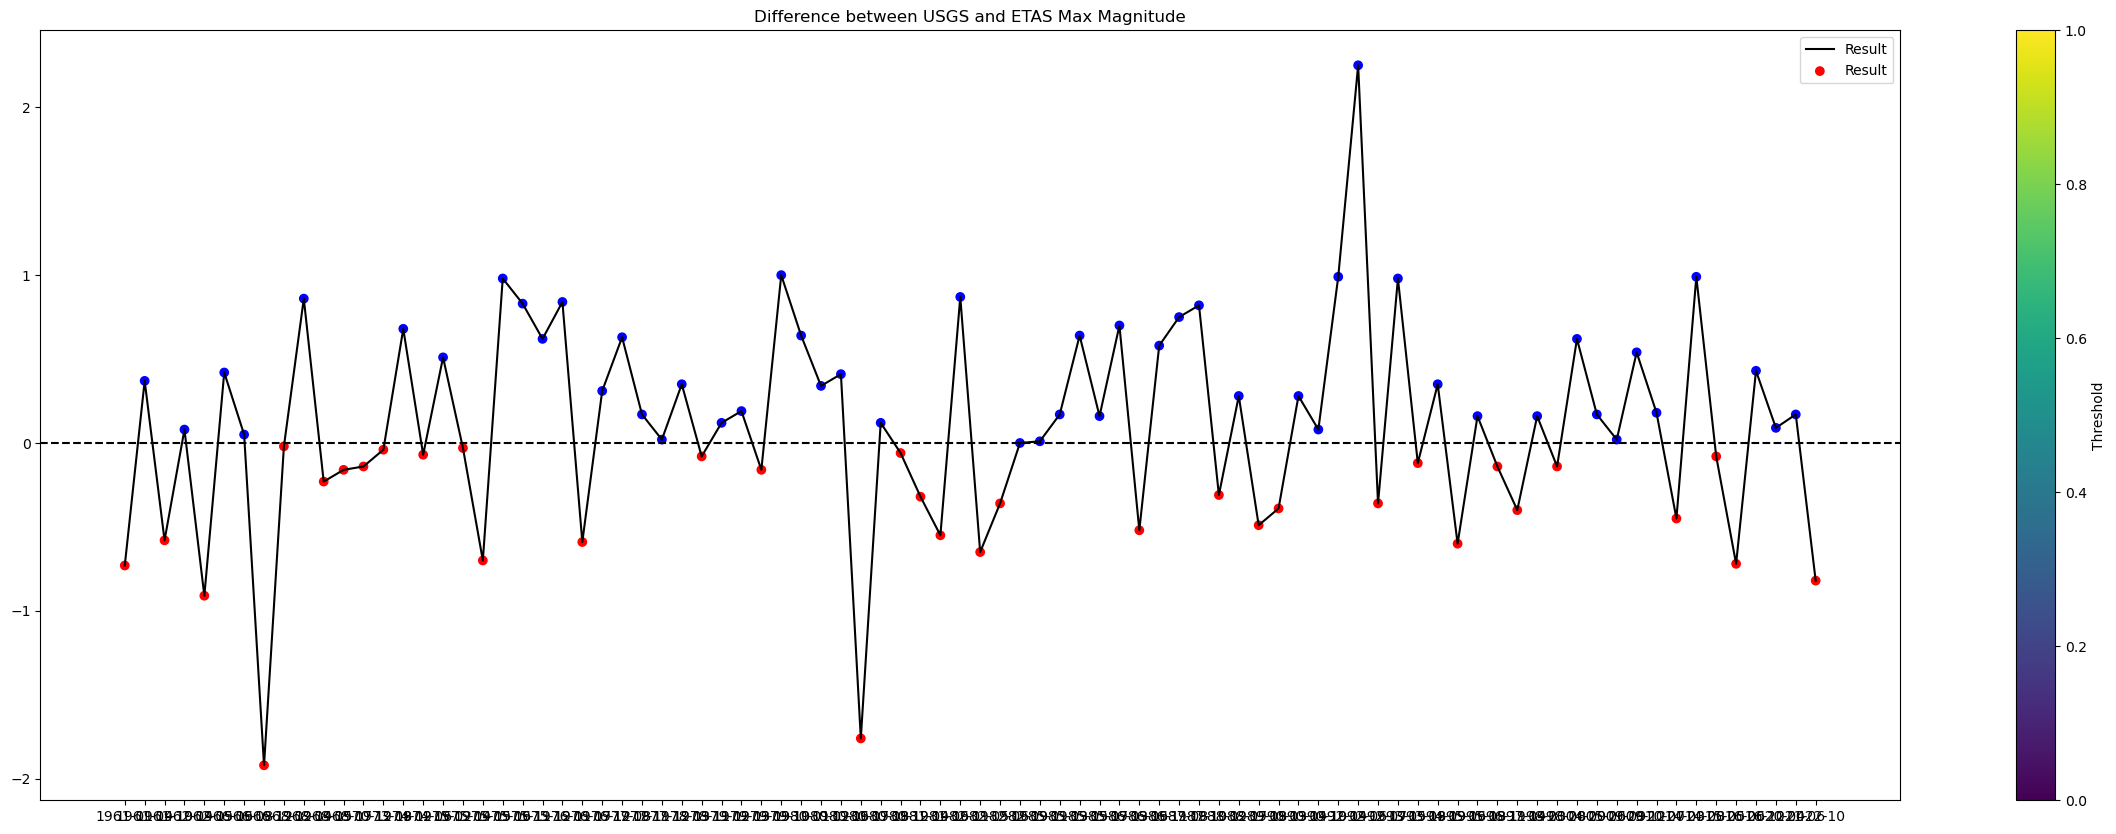

In [169]:
plt.figure(figsize=(30, 10))
plt.plot(x_values, y_values, label='Result', color='black')
plt.scatter(x_values, y_values, c=colors, marker='o', label='Result', cmap='viridis')
plt.colorbar(label='Threshold')
plt.legend()
plt.title('Difference between USGS and ETAS Max Magnitude')

plt.axhline(y=origin, color='black', linestyle='--', label='Origin')

write about this chart

In [170]:

fig = go.Figure()

scatter = go.Scatter(x=x_values, y=y_values, mode='markers', marker=dict(size=10, color=colors, colorscale='viridis'))

fig.add_trace(scatter)
fig.update_traces(line=dict(width=1.0))
fig.update_layout(
    title='Difference between USGS and ETAS Max Magnitude',
    xaxis_title='X-axis Label',
    yaxis_title='Y-axis Label',
    width=1200,
    height=600,
)

fig.show()

In [171]:
greater = y_values > 0
print(len(greater))
lesser = y_values < 0
print(len(lesser))

86
86


ETAS seems to have predicted as many earthquakes with greater magnitudes than what USGS records show as it did earthquakes with lesser magnitudes.

In [172]:
# Create new data frames to store energy values
import math

usgs_max_energy_df = usgs_max.copy()
etas_max_energy_df = etas_max.copy()
usgs_mean_energy_df = mean_mag_usgs.copy()
etas_mean_energy_df = mean_mag_etas.copy()
usgs_sum_mag_energy_df = sum_mag_usgs.copy()
etas_sum_mag_energy_df = sum_mag_etas.copy()
formula_constant = (1/1.5)

usgs_max_energy_df['USGS'] = 10**(1.5*usgs_max_energy_df['USGS']) 
usgs_max_energy_df['USGS'] = np.log(usgs_max_energy_df['USGS']) * formula_constant 

etas_max_energy_df['ETAS'] = 10**(1.5*etas_max_energy_df['ETAS']) 
etas_max_energy_df['ETAS'] = np.log(etas_max_energy_df['ETAS']) * formula_constant 

usgs_mean_energy_df['USGS'] = 10**(1.5*usgs_mean_energy_df['USGS'])
usgs_mean_energy_df['USGS'] = np.log(usgs_mean_energy_df['USGS']) * formula_constant

etas_mean_energy_df['ETAS'] = 10**(1.5*etas_mean_energy_df['ETAS'])
etas_mean_energy_df['ETAS'] = np.log(etas_mean_energy_df['ETAS']) * formula_constant

usgs_sum_mag_energy_df['USGS'] = 10**(1.5*usgs_sum_mag_energy_df['USGS'])
usgs_sum_mag_energy_df['USGS'] = np.log(usgs_sum_mag_energy_df['USGS']) * formula_constant

etas_sum_mag_energy_df['ETAS'] = 10**(1.5*etas_sum_mag_energy_df['ETAS'])
etas_sum_mag_energy_df['ETAS'] = np.log(etas_sum_mag_energy_df['ETAS']) * formula_constant

In [173]:
max_energy_df = usgs_max_energy_df.merge(etas_max_energy_df, on='Date')
max_energy_df['Date'] = max_energy_df['Date'].dt.to_timestamp()
max_energy_df.head()

,Date,USGS,ETAS
0,1961-01-01,11.628055,13.308942
1,1961-04-01,13.539200,12.687244
2,1961-10-01,11.812262,13.147761
3,1962-04-01,11.743184,11.558977
4,1962-05-01,11.743184,13.838536


In [174]:
# Max energy dataframe plot

# Create a Plotly figure
fig = px.line(max_energy_df, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Energy'}, title='ETAS vs USGS Max Earthquake Energy')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

This chart compares the energy generated by the maximum magnitude earthquake generated by ETAS each month to USGS records. Data is fairly consistent, outside of occasional USGS spikes that ETAS can't simulate. 

In [175]:
mean_energy_df = usgs_mean_energy_df.merge(etas_mean_energy_df, on='Date')
mean_energy_df['Date'] = mean_energy_df['Date'].dt.to_timestamp()
mean_energy_df.head()

,Date,USGS,ETAS
0,1960-01-01,8.446650,7.656981
1,1960-02-01,7.722295,7.869862
2,1960-03-01,7.705985,8.051963
3,1960-04-01,8.337916,7.794562
4,1960-05-01,7.882516,7.918261


In [176]:
# Mean energy dataframe plot

mean_energy_df = usgs_mean_energy_df.merge(etas_mean_energy_df, on='Date')
mean_energy_df['Date'] = mean_energy_df['Date'].dt.to_timestamp()

# Create a Plotly figure
fig = px.line(mean_energy_df, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Energy'}, title='ETAS vs USGS Mean Earthquake Energy')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

This chart compares the mean energy generated by earthquakes each month. ETAS and USGS data is fairly consistent after 1970, which is when USGS observation standards and methods improved (explain why this matters/how methods changed).

In [177]:
sum_mag_energy_df = usgs_sum_mag_energy_df.merge(etas_sum_mag_energy_df, on='Date')
sum_mag_energy_df['Date'] = sum_mag_energy_df['Date'].dt.to_timestamp()
sum_mag_energy_df.head()

,Date,USGS,ETAS
0,1960-01-01,101.359796,398.163014
1,1960-02-01,61.778358,291.184911
2,1960-03-01,46.235909,418.702073
3,1960-04-01,75.041248,288.398783
4,1960-05-01,47.295098,277.139142


In [178]:
# Sum mag energy dataframe plot

# Create a Plotly figure
fig = px.line(sum_mag_energy_df, x='Date', y=['ETAS', 'USGS'], labels={'value': 'Energy'}, title='ETAS vs USGS Sum Magnitude Energy')
fig.update_layout(
    width=1200,
    height=600,
)

fig.update_traces(line=dict(width=1.0))
# Add interactivity
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(dragmode='pan', hovermode='x')

# Show the interactive plot
fig.show()

This chart compares the total energy generated by ETAS each month with the recorded values from earthquakes in USGS records. Data is consistent after 1970, which is when USGS observation standards and methods improved (explain why this matters/how methods changed).